# Explore data

In [187]:
import pandas as pd
from icecream import ic

In [188]:
df = pd.read_csv("b117_data_SA.csv")[1:].rename(columns={"0":"created_at", "1":"id", "2":"text", "3":"mettef", "4":"b117", "5":"wider"})
df = df.sort_values(by='created_at').reset_index(drop=True)
ic(len(df))
df.head()

ic| len(df): 78822


,created_at,id,text,mettef,b117,wider,neg,neu,pos,compound
0,2020-04-15 15:59:00,1.250454e+18,"Er det bare mig, eller minder denne engelske #...",0,[],['engelsk'],0.000,0.947,0.053,0.0857
1,2020-04-15 16:16:53,1.250458e+18,@minkonto @denaegteemil Det kalder lidt på at ...,0,[],['mink'],0.000,1.000,0.000,0.0000
2,2020-04-15 16:19:15,1.250459e+18,@minkonto @denaegteemil Ketchup - altså det rø...,0,[],['mink'],0.000,0.789,0.211,0.6523
3,2020-04-15 16:29:52,1.250461e+18,@minkonto @kjellerupbiz @denaegteemil Glimrend...,0,[],['mink'],0.206,0.706,0.088,-0.4588
4,2020-04-15 16:34:20,1.250462e+18,@minkonto @kjellerupbiz @denaegteemil Gå i de ...,0,[],['mink'],0.077,0.813,0.110,0.2790


In [189]:
# Choose date range from 1.st of Dec
df["date"] = pd.to_datetime(df["created_at"], utc=True).dt.strftime('%Y-%m-%d')
mask = (df['date'] > '2020-11-30') & (df['date'] <= '2021-2-20')
df = df.loc[mask]

In [191]:
df.date.unique()

array(['2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
       '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08',
       '2020-12-09', '2020-12-10', '2020-12-11', '2020-12-12',
       '2020-12-13', '2020-12-14', '2020-12-15', '2020-12-16',
       '2020-12-17', '2020-12-18', '2020-12-19', '2020-12-20',
       '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
       '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
       '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-01',
       '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
       '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09',
       '2021-01-10', '2021-01-11', '2021-01-12', '2021-01-13',
       '2021-01-14', '2021-01-15', '2021-01-16', '2021-01-17',
       '2021-01-18'], dtype=object)

## Remove quote tweets

In [192]:
import re
def remove_mentions(row):
    tweet = row["text"]
    clean_tweet = re.sub(r'@(\S*)\w', '', tweet)
    # Remove URLs
    url_pattern = re.compile(
        r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})')
    clean_tweet = re.sub(url_pattern, '', clean_tweet)
    return clean_tweet

In [193]:
df["mentioneless_text"] = df.apply(lambda row: remove_mentions(row), axis = 1)
df["text30"] = df["mentioneless_text"].str[0:30]
df["text40"] = df["mentioneless_text"].str[0:40]
df["text50"] = df["mentioneless_text"].str[0:50]

In [194]:
df["dupe30"] = df["text30"].duplicated(keep = "first")
df["dupe40"] = df["text40"].duplicated(keep = "first")
df["dupe50"] = df["text50"].duplicated(keep = "first")

In [195]:
ic(len(df[df["dupe30"] == True]))
ic(len(df[df["dupe40"] == True]))
ic(len(df[df["dupe50"] == True]))

ic| len(df[df["dupe30"] == True]): 686
ic| len(df[df["dupe40"] == True]): 632
ic| len(df[df["dupe50"] == True]): 598


598

In [196]:
df = df[df["dupe50"] == False].reset_index()

## Which combination of keywords resulted with highest counts of matches

In [197]:
# Narrow search
df.groupby(["b117"]).count().reset_index()

,b117,index,created_at,id,text,mettef,wider,neg,neu,pos,compound,date,mentioneless_text,text30,text40,text50,dupe30,dupe40,dupe50
0,"['b117', 'britiske corona']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,"['b117', 'britiske virus', 'mutation']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,"['b117', 'britiske virus']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,"['b117', 'mutation']",23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
4,['b117'],302,302,302,302,302,302,302,302,302,302,302,302,302,302,302,302,302,302
5,"['britisk corona', 'mutation']",2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
6,['britisk corona'],12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
7,"['britisk virus', 'mutation']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,['britisk virus'],1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,"['britiske corona', 'mutation']",7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [198]:
# Wide search
df.groupby(["wider"]).count().reset_index()

,wider,index,created_at,id,text,mettef,b117,neg,neu,pos,compound,date,mentioneless_text,text30,text40,text50,dupe30,dupe40,dupe50
0,"['engelsk', 'mink']",16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
1,['engelsk'],2864,2864,2864,2864,2864,2864,2864,2864,2864,2864,2864,2864,2864,2864,2864,2864,2864,2864
2,['mink'],11439,11439,11439,11439,11439,11439,11439,11439,11439,11439,11439,11439,11439,11439,11439,11439,11439,11439
3,"['mutant', 'engelsk', 'mink']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,"['mutant', 'engelsk']",7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
5,"['mutant', 'mink']",9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
6,['mutant'],94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94
7,[],1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506


## Check whether different keywords return meaningful Covid tweets

In [199]:
mutation = df[df["wider"] == "['mutant']"]

In [200]:
for i in mutation["text"][0:10]:
    print(i)

@matratvr @MBrgger Giv det 5 år og vi har radioaktiv mutant svineinfluenza
@hanneejensen Hmm. Yondu, kanskje? En opprinnelig Guardian of the Galaxy. Captain Marvel er ganske kul (og jeg digger Brie Larson). Og selvfølgelig Wanda, selv om jeg først og fremst ser på henne som Magnetos datter og en råkul mutant. Men nei, det er nok Deadpool (antihelt) (phase 5, go!).
Endnu en ny casting til den allerede vilde rollebesætning på den kommende 'Spider-Man 3'. Teenage Mutant Ninja Turtles kommer OGSÅ til at være med 🤪🤪🤪 https://t.co/nFECqPP9sd
@BrianEquator Tjo samme princip, men IS overtrædelse er minimal, efter hvad jeg kan læse.  En ofring af IS betyder intet for Mette Mutants skæbne. Venstrefløjen vil beskytte hende ligegyldigt hvad
@sarahskarum Der bliver jo borgerkrig i DK hvis hunde identificeres som mulige mutant objekter og skal slås ned.
@tobiasholst @Haag_Jens plus Invisible Inc, Mutant Year Zero og Massive Chalice. Men måske det er derfor Jens kalder det et lunkent gamer take.
@DRN

In [201]:
engelsk = df[df["wider"] == "['engelsk']"]
for i in engelsk["text"][0:10]:
    print(i)

Tirsdagens Sikre engelske valg på BN… https://t.co/AEvheMrdKJ
@JohanHedegaardJ @Danskeuni Men Johan, alternativet er, at UFM lukker engelsksprogede uddannelser. Jeg tror @Danskeuni er helt på linje med dig i forhold til værdien af int. studerende, og ønsker en andel vej frem end at reducere antallet.
For fem år siden DF foreslog skat på brug af engelske ord i danske tekster: softice, weekend, housecoat, wc, milkshake, burger, computer, pc, internet, email, jazz, rock, blues, whist, poker, router, laptop, server, wifi, hifi, ghettoblaster. https://t.co/ZCxwOAqoIZ
@bsdphk @larsaliciously @dortetoft Begge dele. Ingen journalister født efter 1990 kan andet end engelsk, og ingen danskere gider læse om andet end USA, hvis det er fra det store udland. Se bare hvor amok dækningen af det amerikanske præsidentvalg gik. Og det var flittigt læst/set/hørt siger alle medier. Polen? bah
@traetungdame_ EMILIE!!!!!  HVORFOR skriver du halvdelen af dit tweeted på engelsk?. Are you from another planet?.


"muation" is fine but "engelsk" is mostly actually just English.

## Remove the rows where it's just ['engelsk']

In [202]:
ic(len(df))
clean_df = df[df["wider"] != "['engelsk']"]
ic(len(clean_df))
rmv_list = ["['mink']", "['engelsk', 'mink']", "['mutant', 'engelsk', 'mink']", "['mutant', 'mink']"]
clean_df = clean_df[~clean_df.wider.isin(rmv_list)]
ic(len(clean_df))

ic| len(df): 15936
ic| len(clean_df): 13072
ic| len(clean_df): 1607


1607

In [203]:
# Narrow search
clean_df.groupby(["b117"]).count().reset_index()

,b117,index,created_at,id,text,mettef,wider,neg,neu,pos,compound,date,mentioneless_text,text30,text40,text50,dupe30,dupe40,dupe50
0,"['b117', 'britiske corona']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,"['b117', 'britiske virus', 'mutation']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,"['b117', 'britiske virus']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,"['b117', 'mutation']",20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
4,['b117'],292,292,292,292,292,292,292,292,292,292,292,292,292,292,292,292,292,292
5,"['britisk corona', 'mutation']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,['britisk corona'],12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
7,"['britisk virus', 'mutation']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,['britisk virus'],1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,"['britiske corona', 'mutation']",5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [204]:
clean_df.groupby(["wider"]).count().reset_index()

,wider,index,created_at,id,text,mettef,b117,neg,neu,pos,compound,date,mentioneless_text,text30,text40,text50,dupe30,dupe40,dupe50
0,"['mutant', 'engelsk']",7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
1,['mutant'],94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94
2,[],1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506


# Visualize

In [205]:
# Aggregate a frequency DF
def get_tweet_frequencies(df):
    # Add freq of hashtags by themselves in the dataset
    tweet_freq = pd.DataFrame({'nr_of_tweets' : df.groupby(['date']).size()}).reset_index()

    # Add the whole_frew to id_hashtag
    freq_hashtags = pd.merge(df, tweet_freq, how='left', on=['date'])#, 'id', 'created_at'])
    
    df0 = freq_hashtags
    return df0

In [206]:
# Create a column which is just date
clean_df["date"] = pd.to_datetime(clean_df["created_at"], utc=True).dt.strftime('%Y-%m-%d')

freq_df = get_tweet_frequencies(clean_df)
freq_df.head()

,index,created_at,id,text,mettef,b117,wider,neg,neu,pos,compound,date,mentioneless_text,text30,text40,text50,dupe30,dupe40,dupe50,nr_of_tweets
0,50942,2020-12-01 16:02:29,1.333804e+18,@Westegnen Jo flere nye mutationer desto størr...,0,['mutation'],[],0.000,0.833,0.167,0.7519,2020-12-01,Jo flere nye mutationer desto større risiko f...,Jo flere nye mutationer desto,Jo flere nye mutationer desto større ri,Jo flere nye mutationer desto større risiko f...,False,False,False,4
1,50977,2020-12-01 18:05:43,1.333835e+18,@marie_bjerre @dkpolparrot Måske fordi ingen h...,0,['mutation'],[],0.144,0.787,0.070,-0.6062,2020-12-01,Måske fordi ingen havde interesse i at en mu...,Måske fordi ingen havde inte,Måske fordi ingen havde interesse i at,Måske fordi ingen havde interesse i at en mu...,False,False,False,4
2,50988,2020-12-01 18:36:21,1.333842e+18,@cdamgaard @dkpolparrot Efterfølgende fik jo s...,0,['mutation'],[],0.043,0.736,0.221,0.4276,2020-12-01,"Efterfølgende fik jo så ad vide, at der slet...",Efterfølgende fik jo så ad v,"Efterfølgende fik jo så ad vide, at de","Efterfølgende fik jo så ad vide, at der slet...",False,False,False,4
3,50993,2020-12-01 18:49:06,1.333846e+18,@TV2Nord Cluster 5 mutationen er en af Kåre Mø...,0,['mutation'],[],0.097,0.903,0.000,-0.6476,2020-12-01,Cluster 5 mutationen er en af Kåre Mølbaks fa...,Cluster 5 mutationen er en af,Cluster 5 mutationen er en af Kåre Mølb,Cluster 5 mutationen er en af Kåre Mølbaks fa...,False,False,False,4
4,51157,2020-12-02 05:45:17,1.334011e+18,@pelledragsted Det er ligesom slået fast mere ...,0,['mutation'],[],0.279,0.697,0.024,-0.9458,2020-12-02,Det er ligesom slået fast mere end en gang at...,Det er ligesom slået fast mer,Det er ligesom slået fast mere end en g,Det er ligesom slået fast mere end en gang at...,False,False,False,6


In [207]:
freq_df.nr_of_tweets.describe()

count    1607.000000
mean       69.326073
std        38.448629
min         2.000000
25%        44.000000
50%        69.000000
75%        93.000000
max       146.000000
Name: nr_of_tweets, dtype: float64

In [208]:
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyplot_themes as themes
import datetime as dt

In [209]:
freq_df["date"] = pd.to_datetime(freq_df["date"])
freq_df['date_ordinal'] = pd.to_datetime(freq_df['date']).apply(lambda date: date.toordinal())


# Add dates to the plot
20th/21st of December 2020 - Danmark announces 48h flight ban from UK active 21/12-23/12 10 am https://www.trm.dk/nyheder/2020/danmark-lukker-luftrummet-for-britisk-indflyvning/

23rd of December – Flight ban from UK extended until 24th https://www.trm.dk/nyheder/2020/flyveforbud-forlaenges-til-og-med-24-december/

5th of January 2021 - Press-conference, highest alert level, new 5m distancing rules https://www.thelocal.dk/20210105/latest-denmark-moves-to-highest-covid-19-alert-level-amid-concerns-over-b117-variant

13th of January 2021 - New press-conference, extending lockdown until 7th of February (media mentions both UK and South Africa covid mutations)  https://www.kristeligt-dagblad.dk/danmark/sundhedsministeriet-indkalder-til-pressemode; https://www.berlingske.dk/politik/mette-frederiksen-aabner-op-for-at-forlaenge-restriktioner-yderligere

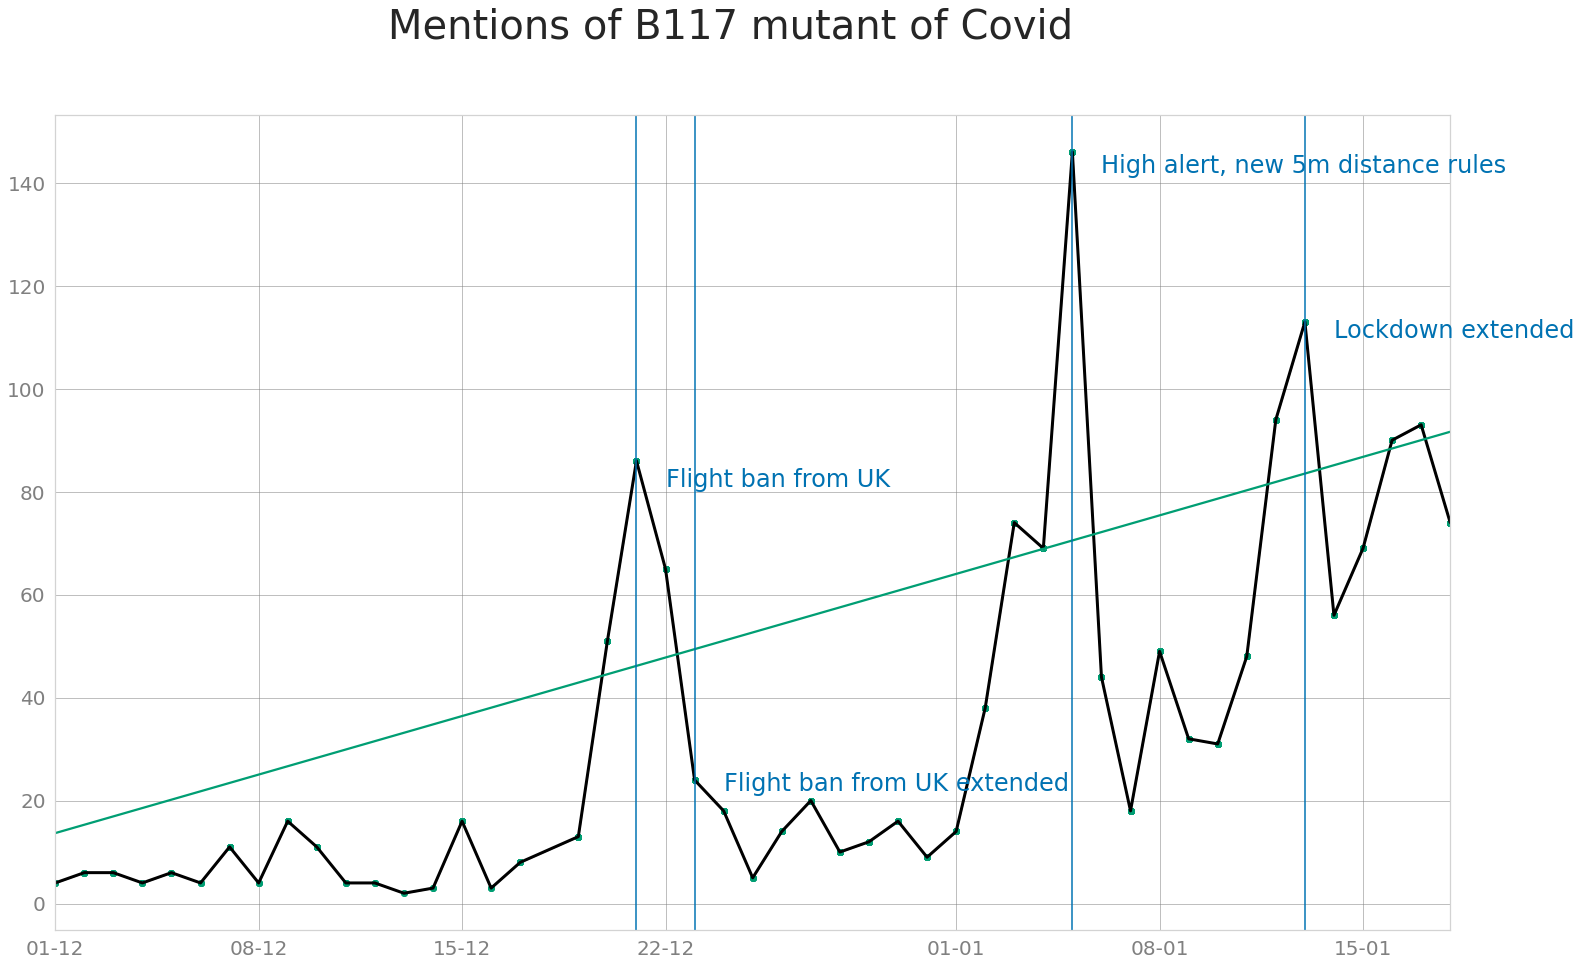

In [210]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

nr_colors = len(freq_df["date"].unique())

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
ax1 = sns.lineplot(x="date", y="nr_of_tweets", 
                  palette = palette[0], 
                     linewidth = 3, data = freq_df)
ax1 = sns.regplot(
    data=freq_df,
    x='date_ordinal',
    y='nr_of_tweets',
    color = palette[3],
    ci=False
    #y_jitter=.5
)


ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")


plt.axvline(dt.datetime(2020, 12, 21), color=palette[5])
plt.text(x = dt.datetime(2020, 12, 22), # x-coordinate position of data label, adjusted to be 3 right of the data point
 y = 81, # y-coordinate position of data label, to take max height 
 s = 'Flight ban from UK', # data label
 color = palette[5])

plt.axvline(dt.datetime(2020, 12, 23), color=palette[5])
plt.text(x = dt.datetime(2020, 12, 24), # x-coordinate position of data label, adjusted to be 3 right of the data point
 y = 22, # y-coordinate position of data label, to take max height 
 s = 'Flight ban from UK extended', # data label
 color = palette[5])

plt.axvline(dt.datetime(2021, 1, 5), color=palette[5])
plt.text(x = dt.datetime(2021, 1, 6), # x-coordinate position of data label, adjusted to be 3 right of the data point
 y = 142, # y-coordinate position of data label, to take max height 
 s = 'High alert, new 5m distance rules', # data label
 color = palette[5])

plt.axvline(dt.datetime(2021, 1, 13), color=palette[5])
plt.text(x = dt.datetime(2021, 1, 14), # x-coordinate position of data label, adjusted to be 3 right of the data point
 y = 110, # y-coordinate position of data label, to take max height 
 s = 'Lockdown extended', # data label
 color = palette[5])

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

    
fig.suptitle("Mentions of B117 mutant of Covid", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()

plot_name = "fig/all_mutations_mentions.png"
fig.savefig(plot_name)

fig.show()

In [211]:
freq_df["nr_of_tweets"].describe()

count    1607.000000
mean       69.326073
std        38.448629
min         2.000000
25%        44.000000
50%        69.000000
75%        93.000000
max       146.000000
Name: nr_of_tweets, dtype: float64

In [212]:
freq_df[freq_df["nr_of_tweets"] > 100]

,index,created_at,id,text,mettef,b117,wider,neg,neu,pos,...,date,mentioneless_text,text30,text40,text50,dupe30,dupe40,dupe50,nr_of_tweets,date_ordinal
650,62786,2021-01-05 06:17:35,1.346340e+18,Vi er nødt til at lukke samfundet mere ned pga...,0,['mutation'],[],0.033,0.900,0.067,...,2021-01-05,Vi er nødt til at lukke samfundet mere ned pga...,Vi er nødt til at lukke samfun,Vi er nødt til at lukke samfundet mere n,Vi er nødt til at lukke samfundet mere ned pga...,False,False,False,146,737795
651,62791,2021-01-05 06:38:41,1.346345e+18,@FlymerDindler @sorenkjems SF har hver gang ta...,0,['mutation'],[],0.286,0.628,0.086,...,2021-01-05,SF har hver gang taget politisk stilling ift...,SF har hver gang taget polit,SF har hver gang taget politisk stilli,SF har hver gang taget politisk stilling ift...,False,False,False,146,737795
652,62792,2021-01-05 06:40:09,1.346346e+18,@Jespermeik @wagnerleth1969 Nej heldigvis men ...,0,['mutation'],[],0.000,1.000,0.000,...,2021-01-05,Nej heldigvis men mutationen er voldsom smit...,Nej heldigvis men mutationen,Nej heldigvis men mutationen er voldso,Nej heldigvis men mutationen er voldsom smit...,False,False,False,146,737795
653,62795,2021-01-05 06:44:28,1.346347e+18,@ann_woodall9 Den har jeg med i min kalkule😉. ...,0,['mutation'],[],0.000,0.844,0.156,...,2021-01-05,Den har jeg med i min kalkule😉. Vi skal have ...,Den har jeg med i min kalkule,Den har jeg med i min kalkule😉. Vi skal,Den har jeg med i min kalkule😉. Vi skal have ...,False,False,False,146,737795
654,62797,2021-01-05 06:51:57,1.346349e+18,@PeterErikHansen Jeg er uenig og ja som du sik...,0,['mutation'],[],0.222,0.778,0.000,...,2021-01-05,"Jeg er uenig og ja som du sikkert ved, så er ...",Jeg er uenig og ja som du sik,"Jeg er uenig og ja som du sikkert ved,","Jeg er uenig og ja som du sikkert ved, så er ...",False,False,False,146,737795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,65797,2021-01-13 22:11:48,1.349479e+18,@CJ1AJ @SHvidberg @ABS_Racing B117 er heller i...,0,['b117'],[],0.000,0.913,0.087,...,2021-01-13,B117 er heller ikke den eneste - Der er ogs...,B117 er heller ikke den ene,B117 er heller ikke den eneste - Der,B117 er heller ikke den eneste - Der er ogs...,False,False,False,113,737803
1221,65810,2021-01-13 22:48:05,1.349488e+18,Med den formodentlig mere smitsomme britiske v...,0,['b117'],[],0.000,1.000,0.000,...,2021-01-13,Med den formodentlig mere smitsomme britiske v...,Med den formodentlig mere smit,Med den formodentlig mere smitsomme brit,Med den formodentlig mere smitsomme britiske v...,False,False,False,113,737803
1222,65825,2021-01-13 23:22:55,1.349497e+18,@Kong_Kret Mhm - B117 er desuden ikke den enes...,0,['b117'],['mutant'],0.000,0.872,0.128,...,2021-01-13,"Mhm - B117 er desuden ikke den eneste nye ""mu...",Mhm - B117 er desuden ikke de,Mhm - B117 er desuden ikke den eneste n,"Mhm - B117 er desuden ikke den eneste nye ""mu...",False,False,False,113,737803
1223,65829,2021-01-13 23:33:31,1.349500e+18,@timlau Okay! Så den første Covid19 skal hedde...,0,['mutation'],[],0.063,0.851,0.087,...,2021-01-13,Okay! Så den første Covid19 skal hedde Bruce ...,Okay! Så den første Covid19 s,Okay! Så den første Covid19 skal hedde,Okay! Så den første Covid19 skal hedde Bruce ...,False,False,False,113,737803


## Important peaking dates

In [213]:
jan_peak = freq_df[freq_df["date"] == "2021-01-05"]
for i in jan_peak["text"]:
    print(i)
    print("\n")

Vi er nødt til at lukke samfundet mere ned pga den britiske mutation af COVID-19. Udviklingen er dybt bekymrende. SF foreslår derfor regeringen nødpasning i daginstitutionerne og at færre mødes. Vi er nødt til at stoppe smitten ellers ender vi med britiske tilstande #dkpol


@FlymerDindler @sorenkjems SF har hver gang taget politisk stilling ift de oplysninger vi har haft og jeg synes at den britiske mutation i den grad viser at man skal tage mutationer alvorligt. Ligeledes er jeg bekymret for den sydafrikanske.


@Jespermeik @wagnerleth1969 Nej heldigvis men mutationen er voldsom smitbar og er allerede i DK, så nu skal vi stoppe op


@ann_woodall9 Den har jeg med i min kalkule😉. Vi skal have vaccineret mange mange flere inden vi kan færdes frit, specielt med to mutationer på vej ind over dørtrinet


@PeterErikHansen Jeg er uenig og ja som du sikkert ved, så er SF ikke regeringen, så vi fastholder vores forslag om nødpasning i daginstitutionerne. Den britiske mutation smitter for volds

In [214]:
#print(jan_peak.reset_index()["text"][15])
#print(jan_peak.reset_index()["text"][16])
#print(jan_peak.reset_index()["text"][17])
#print(jan_peak.reset_index()["text"][18])
#print(jan_peak.reset_index()["text"][19])
#print(jan_peak.reset_index()["text"][20])
#print(jan_peak.reset_index()["text"][21])

In [215]:
dec_peak = freq_df[freq_df["date"] == "2020-12-21"]

for i in dec_peak["text"]:
    print(i)
    print("\n")

@Heunicke Godt. Hvad med de fly, som er landet i dag og i går? Hvad med de cases af mutationen, som allerede er i landet og opdaget af ssi?


Symbolpolitik når mutationen har været i Danmark siden hvert fald 14. november? https://t.co/PxKbvUQpAu #dkpol


NEJENEJJJJ FOLK I REPLIES SIGER MUTATIONEN ER FUNDET I NORDJYLLAND GODNAT ALLESAMMEN


VENT . HVIS MUTATIONEN ER FUNDET I NORDJYLLAND SKAL VI SÅ LUKKES NED IGEN ,,,,,, ,


@KT_Baek @BennyEngelbrech @Heunicke Mutationen har været kendt siden september i UK uden at flytrafik blev lukket ned. Det virker som endnu en forsinket panikreaktion (oxymoron) lige med cluster 5


@harrylftv apparently er der tilfælde af den der fucking britiske mutation her i nordjylland😭😭 tror ikk vi bliver lukket ned igen men i et sekund var jeg helt “fuck”


Jeg orker ikke at tænke på, at dette kan være en reel bombe under de vacciner, der endelig er blevet klar til brug. Og kan det ske en gang, at der dukker vaccineresistente mutationer op, så kan det ske igen

In [216]:
print("January peak:")
print(jan_peak["b117"].unique())
print(jan_peak["wider"].unique())

print("December peak:")
print(dec_peak["b117"].unique())
print(dec_peak["wider"].unique())

January peak:
["['mutation']" '[]' "['b117']" "['britiske corona']"
 "['b117', 'mutation']" "['britiske corona', 'mutation']"
 "['b117', 'britiske virus', 'mutation']"]
['[]' "['mutant']" "['mutant', 'engelsk']"]
December peak:
["['mutation']" "['britiske virus', 'mutation']" "['b117']" '[]'
 "['britisk virus']" "['britisk corona']"]
['[]' "['mutant']"]


In [217]:
# January and December data
jan = freq_df[pd.to_datetime(freq_df['date']).dt.month == 1].reset_index(drop=True)
dec = freq_df[pd.to_datetime(freq_df['date']).dt.month == 12].reset_index(drop=True)

print("January   ",len(jan))
print("December  ",len(dec))

January    1152
December   455


In [218]:
ic(jan.describe())
ic(dec.describe())

ic| jan.describe():               index            id          neg          neu          pos  \
                    count   1152.000000  1.152000e+03  1152.000000  1152.000000  1152.000000   
                    mean   64750.857639  1.348433e+18     0.058611     0.856760     0.084622   
                    std     1673.134312  1.880134e+15     0.073627     0.100405     0.075951   
                    min    61868.000000  1.344932e+18     0.000000     0.384000     0.000000   
                    25%    63049.750000  1.346484e+18     0.000000     0.788000     0.000000   
                    50%    65015.500000  1.348925e+18     0.031500     0.862000     0.076000   
                    75%    66387.250000  1.350104e+18     0.099000     0.931000     0.128000   
                    max    67240.000000  1.351314e+18     0.370000     1.000000     0.380000   
                    
                              compound  nr_of_tweets   date_ordinal  
                    count  1152.000000   1152

,index,id,neg,neu,pos,compound,nr_of_tweets,date_ordinal
count,455.000000,4.550000e+02,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,58780.786813,1.340546e+18,0.062281,0.856420,0.081286,0.018951,38.542857,737778.679121
std,2488.786777,2.513648e+15,0.080314,0.101769,0.079513,0.455949,30.420725,6.926797
min,50942.000000,1.333804e+18,0.000000,0.521000,0.000000,-0.955900,2.000000,737760.000000
25%,58746.500000,1.340200e+18,0.000000,0.794500,0.000000,-0.263700,12.000000,737778.000000
50%,59559.000000,1.341032e+18,0.034000,0.865000,0.066000,0.000000,20.000000,737780.000000
75%,60199.500000,1.341760e+18,0.102000,0.934000,0.127500,0.340750,65.000000,737782.000000
max,61790.000000,1.344662e+18,0.417000,1.000000,0.350000,0.953700,86.000000,737790.000000


In [219]:
jan.groupby(["b117"]).count().reset_index()

,b117,index,created_at,id,text,mettef,wider,neg,neu,pos,...,date,mentioneless_text,text30,text40,text50,dupe30,dupe40,dupe50,nr_of_tweets,date_ordinal
0,"['b117', 'britiske corona']",1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,"['b117', 'britiske virus', 'mutation']",1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,"['b117', 'britiske virus']",1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,"['b117', 'mutation']",20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
4,['b117'],288,288,288,288,288,288,288,288,288,...,288,288,288,288,288,288,288,288,288,288
5,"['britisk corona', 'mutation']",1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,['britisk corona'],7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
7,"['britiske corona', 'mutation']",3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
8,['britiske corona'],9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
9,['britiske virus'],6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


In [220]:
dec.groupby(["b117"]).count().reset_index()

,b117,index,created_at,id,text,mettef,wider,neg,neu,pos,...,date,mentioneless_text,text30,text40,text50,dupe30,dupe40,dupe50,nr_of_tweets,date_ordinal
0,['b117'],4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1,['britisk corona'],5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2,"['britisk virus', 'mutation']",1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,['britisk virus'],1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,"['britiske corona', 'mutation']",2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
5,"['britiske virus', 'mutation']",1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,['mutation'],406,406,406,406,406,406,406,406,406,...,406,406,406,406,406,406,406,406,406,406
7,[],35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35


In [221]:
jan.groupby(["wider"]).count().reset_index()

,wider,index,created_at,id,text,mettef,b117,neg,neu,pos,...,date,mentioneless_text,text30,text40,text50,dupe30,dupe40,dupe50,nr_of_tweets,date_ordinal
0,"['mutant', 'engelsk']",7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
1,['mutant'],59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
2,[],1086,1086,1086,1086,1086,1086,1086,1086,1086,...,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086


In [222]:
dec.groupby(["wider"]).count().reset_index()

,wider,index,created_at,id,text,mettef,b117,neg,neu,pos,...,date,mentioneless_text,text30,text40,text50,dupe30,dupe40,dupe50,nr_of_tweets,date_ordinal
0,['mutant'],35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
1,[],420,420,420,420,420,420,420,420,420,...,420,420,420,420,420,420,420,420,420,420


In [223]:
len(dec)

455

# Important words used
#N501Y

# B117 mentions over time

In [224]:
def extract_b117(row):
    tweet = row["text"].lower()
    test_list = ['b117'] 
    res = [ele for ele in test_list if(ele in tweet)] 

    return res

freq_df["b117"] = freq_df.apply(lambda row: extract_b117(row), axis = 1)
freq_df["b117"] = freq_df["b117"].astype(str)
b117 = freq_df[freq_df["b117"] == "['b117']"].reset_index(drop=True)

In [225]:
freq_b117 = get_tweet_frequencies(b117)

In [226]:
freq_b117

,index,created_at,id,text,mettef,b117,wider,neg,neu,pos,...,mentioneless_text,text30,text40,text50,dupe30,dupe40,dupe50,nr_of_tweets_x,date_ordinal,nr_of_tweets_y
0,51488,2020-12-02 21:02:48,1.334242e+18,@tronierdoodle @twhjerne Hvis du gerne vil bli...,0,['b117'],[],0.000,0.964,0.036,...,Hvis du gerne vil blive klogere på kønsneutr...,Hvis du gerne vil blive klog,Hvis du gerne vil blive klogere på køn,Hvis du gerne vil blive klogere på kønsneutr...,False,False,False,6,737761,1
1,59396,2020-12-21 10:06:29,1.340962e+18,"Landene rundt oss tar «action», men ikke Norge...",0,['b117'],[],0.029,0.906,0.065,...,"Landene rundt oss tar «action», men ikke Norge...",Landene rundt oss tar «action»,"Landene rundt oss tar «action», men ikke","Landene rundt oss tar «action», men ikke Norge...",False,False,False,86,737780,1
2,61482,2020-12-29 23:22:47,1.344061e+18,@JonasHerby Bliver der indført forbud mod at f...,0,['b117'],[],0.000,0.795,0.205,...,Bliver der indført forbud mod at forlade Aalb...,Bliver der indført forbud mod,Bliver der indført forbud mod at forlad,Bliver der indført forbud mod at forlade Aalb...,False,False,False,12,737788,1
3,61718,2020-12-31 08:59:52,1.344569e+18,@M_B_Petersen Ser man på den geografiske forde...,0,['b117'],[],0.144,0.856,0.000,...,Ser man på den geografiske fordeling i dk af ...,Ser man på den geografiske fo,Ser man på den geografiske fordeling i,Ser man på den geografiske fordeling i dk af ...,False,False,False,9,737790,1
4,61868,2021-01-01 09:02:29,1.344932e+18,@kimtiede Og hvis B117 varianten breder i DK i...,0,['b117'],[],0.119,0.881,0.000,...,Og hvis B117 varianten breder i DK i løbet af...,Og hvis B117 varianten breder,Og hvis B117 varianten breder i DK i lø,Og hvis B117 varianten breder i DK i løbet af...,False,False,False,14,737791,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,67165,2021-01-18 17:59:54,1.351228e+18,@JonasHerby Så er det jo godt vi har frivillig...,0,['b117'],[],0.048,0.819,0.133,...,Så er det jo godt vi har frivilligheden som a...,Så er det jo godt vi har friv,Så er det jo godt vi har frivilligheden,Så er det jo godt vi har frivilligheden som a...,False,False,False,74,737808,29
311,67201,2021-01-18 20:38:54,1.351268e+18,"@dalgaard_oscar @larsrikart @KVarming Ved du, ...",0,['b117'],[],0.000,0.912,0.088,...,"Ved du, om den oprindelige PCR slår ud på b...","Ved du, om den oprindelige","Ved du, om den oprindelige PCR slår u","Ved du, om den oprindelige PCR slår ud på b...",False,False,False,74,737808,29
312,67209,2021-01-18 21:32:31,1.351281e+18,@Wirlander Senfølgerne efter min b117 nytårsaf...,0,['b117'],[],0.277,0.723,0.000,...,Senfølgerne efter min b117 nytårsaften til .d...,Senfølgerne efter min b117 ny,Senfølgerne efter min b117 nytårsaften,Senfølgerne efter min b117 nytårsaften til .d...,False,False,False,74,737808,29
313,67214,2021-01-18 21:41:19,1.351284e+18,@Wirlander Samme her. Siden negativ så træt i ...,0,['b117'],[],0.000,0.916,0.084,...,Samme her. Siden negativ så træt i hele kropp...,Samme her. Siden negativ så t,Samme her. Siden negativ så træt i hele,Samme her. Siden negativ så træt i hele kropp...,False,False,False,74,737808,29


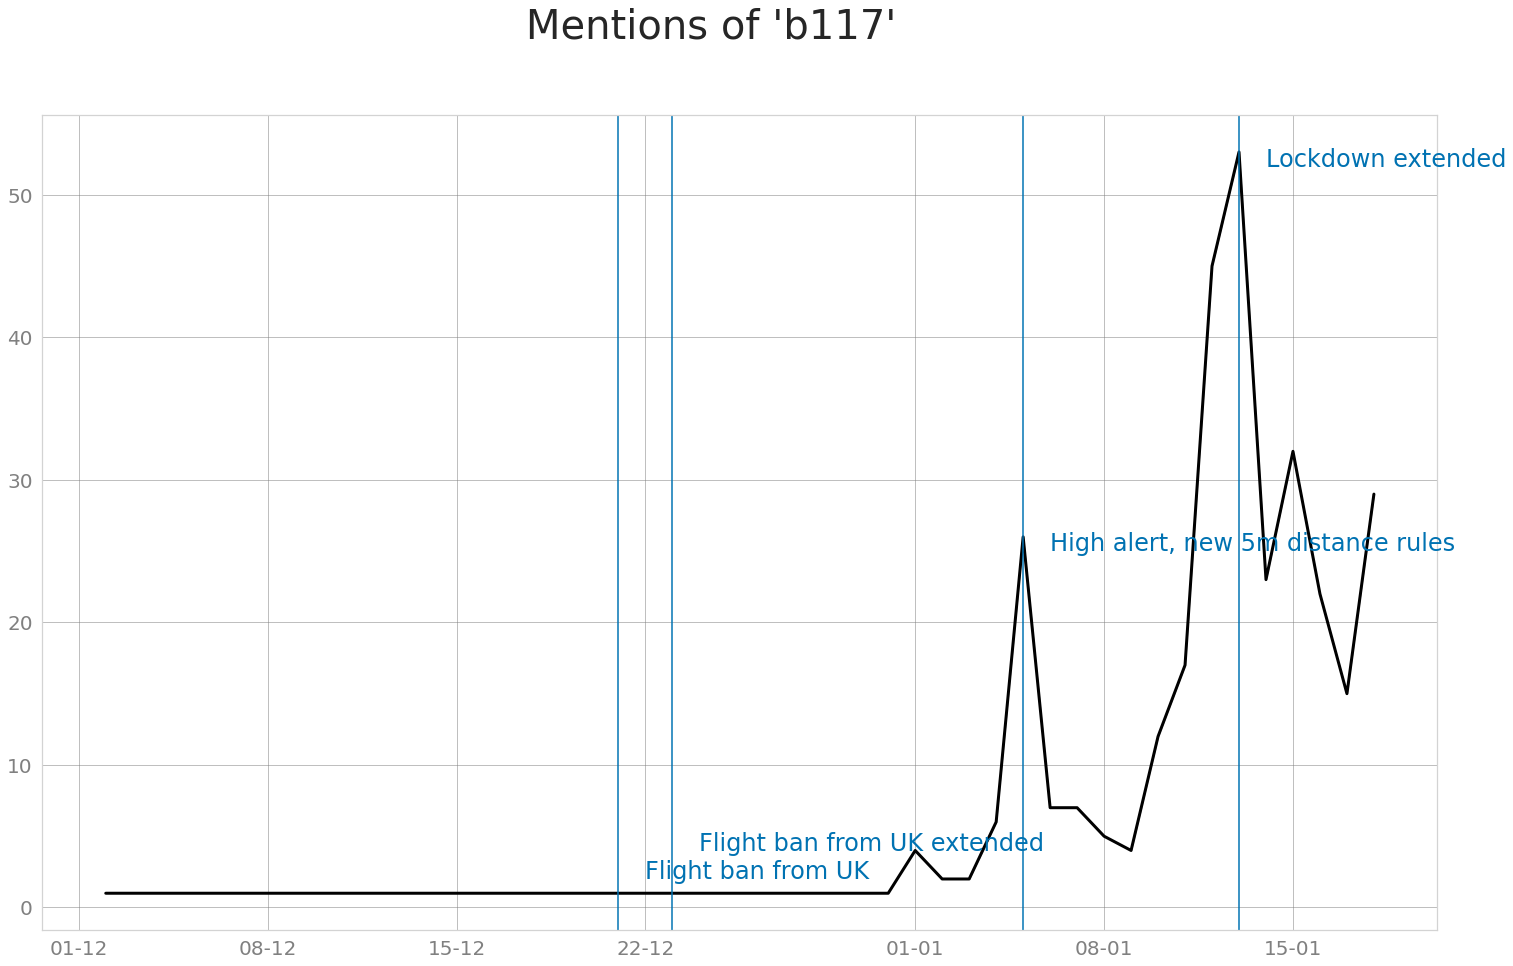

In [227]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

nr_colors = len(freq_df["date"].unique())

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

palette = sns.color_palette("inferno", nr_colors)

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
ax1 = sns.lineplot(x="date", y="nr_of_tweets_y", 
                  palette = palette, 
                     linewidth = 3, data = freq_b117)
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]


plt.axvline(dt.datetime(2020, 12, 21), color=palette[5])
plt.text(x = dt.datetime(2020, 12, 22), # x-coordinate position of data label, adjusted to be 3 right of the data point
 y = 2, # y-coordinate position of data label, to take max height 
 s = 'Flight ban from UK', # data label
 color = palette[5])

plt.axvline(dt.datetime(2020, 12, 23), color=palette[5])
plt.text(x = dt.datetime(2020, 12, 24), # x-coordinate position of data label, adjusted to be 3 right of the data point
 y = 4, # y-coordinate position of data label, to take max height 
 s = 'Flight ban from UK extended', # data label
 color = palette[5])

plt.axvline(dt.datetime(2021, 1, 5), color=palette[5])
plt.text(x = dt.datetime(2021, 1, 6), # x-coordinate position of data label, adjusted to be 3 right of the data point
 y = 25, # y-coordinate position of data label, to take max height 
 s = 'High alert, new 5m distance rules', # data label
 color = palette[5])

plt.axvline(dt.datetime(2021, 1, 13), color=palette[5])
plt.text(x = dt.datetime(2021, 1, 14), # x-coordinate position of data label, adjusted to be 3 right of the data point
 y = 52, # y-coordinate position of data label, to take max height 
 s = 'Lockdown extended', # data label
 color = palette[5])

ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

    
fig.suptitle("Mentions of 'b117' ", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()

plot_name = "fig/mentions_of_b117.png"
fig.savefig(plot_name)

fig.show()

# Hashtags used in this data

In [228]:
import re

def extract_hashtags(row):
    unique_hashtag_list = list(re.findall(r'#\S*\w', row["text"]))
    return unique_hashtag_list

def hashtag_per_row(data):
    # Create hashtags column with the actual unique hashtags
    data["hashtags"] = data.apply(lambda row: extract_hashtags(row), axis = 1)

    # Let's take a subset of necessary columns, add id
    df = data[["date", "hashtags"]].reset_index().rename(columns={"index": "id"})

    # Select only the ones where we have more than 1 hashtag per tweet
    df = df[df["hashtags"].map(len) > 1].reset_index(drop=True)

    # Hashtag per row
    # convert list of pd.Series then stack it
    df = (df
     .set_index(['date','id'])['hashtags']
     .apply(pd.Series)
     .stack()
     .reset_index()
     .drop('level_2', axis=1)
     .rename(columns={0:'hashtag'}))
    #lowercase!
    df["hashtag"] = df["hashtag"].str.lower()
    df["hashtag"] = df["hashtag"].str.replace("'.", "")
    df["hashtag"] = df["hashtag"].str.replace("’.", "")

    return df

#freq_df["hashtags"] = freq_df.apply(lambda row: extract_b117(row), axis = 1)

hashtags = hashtag_per_row(freq_df)

In [229]:
# Aggregate a frequency DF
def get_hashtag_frequencies(df):
    # Add freq of hashtags by themselves in the dataset
    tweet_freq = pd.DataFrame({'nr_of_hashtags' : df.groupby(['hashtag']).size()}).reset_index()

    # Add the whole_frew to id_hashtag
    #freq_hashtags = pd.merge(df, tweet_freq, how='left', on=['date'])#, 'id', 'created_at'])
    
    #df0 = freq_hashtags
    return tweet_freq

In [230]:
freq_hashtags = get_hashtag_frequencies(hashtags)
df = freq_hashtags.sort_values(by=['nr_of_hashtags'], ascending=False)
df

,hashtag,nr_of_hashtags
50,#dkpol,88
31,#covid19dk,57
49,#dkmedier,43
23,#covid19,23
100,#sundpol,15
...,...,...
41,#denbritiskesyge,1
40,#dagensbt,1
39,#covidー19,1
37,#covidhoax,1


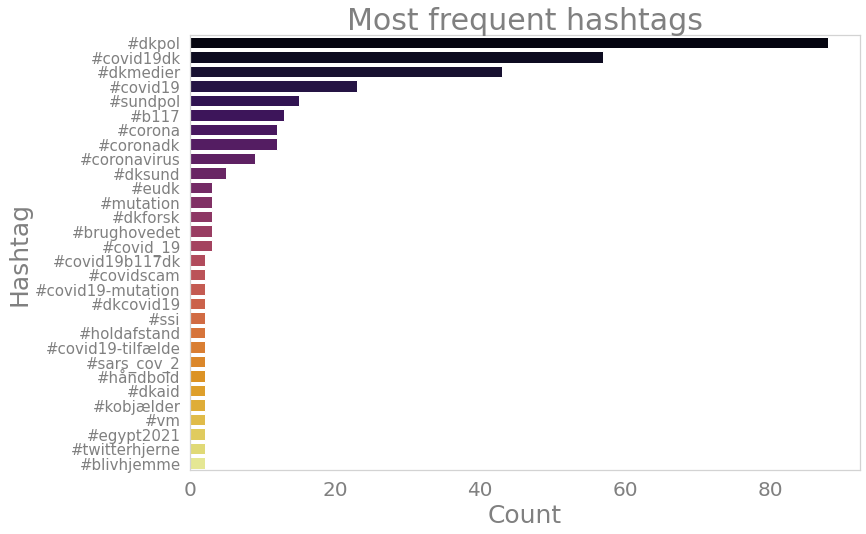

In [231]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pyplot_themes as themes

df0 = df.nlargest(30, columns=['nr_of_hashtags'])
nr_hash = len(df0["hashtag"].unique())

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
palette = sns.color_palette("inferno", nr_hash)

ax = sns.barplot(y="hashtag", x="nr_of_hashtags", palette = palette, data = df0)

ax.set(xlabel="Count", ylabel = "Hashtag")
ax.xaxis.get_label().set_fontsize(25)
ax.yaxis.get_label().set_fontsize(25)
ax.axes.set_title("Most frequent hashtags",fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=15)

plot_name = "fig/frequent_hashtags.png"
fig.savefig(plot_name)

# Compare this dataset with the rest of the tweets during that time
I don't want to make a word cloud

In [232]:
dec_vol = pd.read_csv("tweet_volume_data/dec_data.csv")[1:].rename(columns={"0":"created_at", "1":"id", "2":"text", "3":"mettef", "4":"b117", "5":"wider"})
#dec_vol = dec_vol.sort_values(by='created_at').reset_index(drop=True)
dec_vol = dec_vol[["created_at", "id", "text"]]
ic(len(dec_vol))
dec_vol.head()

/home/commando/maris/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
ic| len(dec_vol): 809864


,created_at,id,text
1,2020-12-20 00:00:02,1340446825988448257,"@SusanneLeth Pyh, det lyder farligt! Men vodka..."
2,2020-12-20 00:00:18,1340446895303495681,@alfonsaaberg100 @stensman Jeg grinede meget h...
3,2020-12-20 00:00:23,1340446916627357696,@axelmoeen Håber du er klar på en dobbelt Padd...
4,2020-12-20 00:00:34,1340446959442812929,@HolgerKropp Jeg fandt frem til samme konklusi...
5,2020-12-20 00:00:36,1340446970096328704,"@adlaramse Ja, du husker forkert søde. Hvis de..."


In [233]:
jan_vol = pd.read_csv("tweet_volume_data/jan_data.csv")[1:].rename(columns={"0":"created_at", "1":"id", "2":"text", "3":"mettef", "4":"b117", "5":"wider"})
#jan_vol = jan_vol.sort_values(by='created_at').reset_index(drop=True)
jan_vol = jan_vol[["created_at", "id", "text"]]
ic(len(jan_vol))
jan_vol.head()

/home/commando/maris/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
ic| len(jan_vol): 321343


,created_at,id,text
1,2021-01-06 00:00:02,1346607420567678989,Så er det sørme onsdag.. #onsdag
2,2021-01-06 00:00:02,1346607422522187776,@AltidFilmperle @Wran70655019 @annebetpedersen...
3,2021-01-06 00:00:04,1346607431145631744,@JacobHinchely Men de opfører sig mere som Jeh...
4,2021-01-06 00:00:07,1346607440964497415,"Element Spring Reverb, Andet mærke Anasounds....."
5,2021-01-06 00:00:11,1346607460375810048,@RolfJuul @NicolaiJee @stensman @TThorsager @T...


In [234]:
data = pd.concat([dec_vol, jan_vol]).reset_index(drop=True)
data = data[data["created_at"] != "created_at"]
ic(len(data))

ic| len(data): 1131205


1131205

In [235]:
import re
def remove_mentions(row):
    tweet = row["text"]
    clean_tweet = re.sub(r'@(\S*)\w', '', tweet)
    # Remove URLs
    url_pattern = re.compile(
        r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})')
    clean_tweet = re.sub(url_pattern, '', clean_tweet)
    return clean_tweet

In [236]:
data["mentioneless_text"] = data.apply(lambda row: remove_mentions(row), axis = 1)
data["text30"] = data["mentioneless_text"].str[0:30]
data["text40"] = data["mentioneless_text"].str[0:40]
data["text50"] = data["mentioneless_text"].str[0:50]

In [237]:
data["dupe30"] = data["text30"].duplicated(keep = False)
data["dupe40"] = data["text40"].duplicated(keep = False)
data["dupe50"] = data["text50"].duplicated(keep = "first")

In [238]:
ic(len(data[data["dupe30"] == True]))
ic(len(data[data["dupe40"] == True]))
ic(len(data[data["dupe50"] == True]))

ic| len(data[data["dupe30"] == True]): 63979
ic| len(data[data["dupe40"] == True]): 51507
ic| len(data[data["dupe50"] == True]): 30955


30955

In [239]:
data_no_dupes = data[data["dupe50"] == False].reset_index()
len(data_no_dupes)

1100250

In [240]:
# Create a column which is just date
#data_no_dupes["created_at"] = pd.to_datetime(data_no_dupes["created_at"], utc=True)
data_no_dupes["date"] = pd.to_datetime(data_no_dupes["created_at"], utc=True).dt.strftime('%Y-%m-%d')

data_freq_df = get_tweet_frequencies(data_no_dupes)
data_freq_df["date"] = pd.to_datetime(data_freq_df["date"])
data_freq_df.head()

,index,created_at,id,text,mentioneless_text,text30,text40,text50,dupe30,dupe40,dupe50,date,nr_of_tweets
0,0,2020-12-20 00:00:02,1340446825988448257,"@SusanneLeth Pyh, det lyder farligt! Men vodka...","Pyh, det lyder farligt! Men vodka (polsk? 😀),...","Pyh, det lyder farligt! Men v","Pyh, det lyder farligt! Men vodka (pols","Pyh, det lyder farligt! Men vodka (polsk? 😀),...",False,False,False,2020-12-20,26585
1,1,2020-12-20 00:00:18,1340446895303495681,@alfonsaaberg100 @stensman Jeg grinede meget h...,"Jeg grinede meget højt, da jeg så dit tweet ...","Jeg grinede meget højt, da j","Jeg grinede meget højt, da jeg så dit","Jeg grinede meget højt, da jeg så dit tweet ...",False,False,False,2020-12-20,26585
2,2,2020-12-20 00:00:23,1340446916627357696,@axelmoeen Håber du er klar på en dobbelt Padd...,Håber du er klar på en dobbelt Paddy mastercl...,Håber du er klar på en dobbel,Håber du er klar på en dobbelt Paddy ma,Håber du er klar på en dobbelt Paddy mastercl...,False,False,False,2020-12-20,26585
3,3,2020-12-20 00:00:34,1340446959442812929,@HolgerKropp Jeg fandt frem til samme konklusi...,Jeg fandt frem til samme konklusion😉 Jeg prøv...,Jeg fandt frem til samme konk,Jeg fandt frem til samme konklusion😉 Je,Jeg fandt frem til samme konklusion😉 Jeg prøv...,False,False,False,2020-12-20,26585
4,4,2020-12-20 00:00:36,1340446970096328704,"@adlaramse Ja, du husker forkert søde. Hvis de...","Ja, du husker forkert søde. Hvis det var mig ...","Ja, du husker forkert søde. H","Ja, du husker forkert søde. Hvis det va","Ja, du husker forkert søde. Hvis det var mig ...",False,False,False,2020-12-20,26585


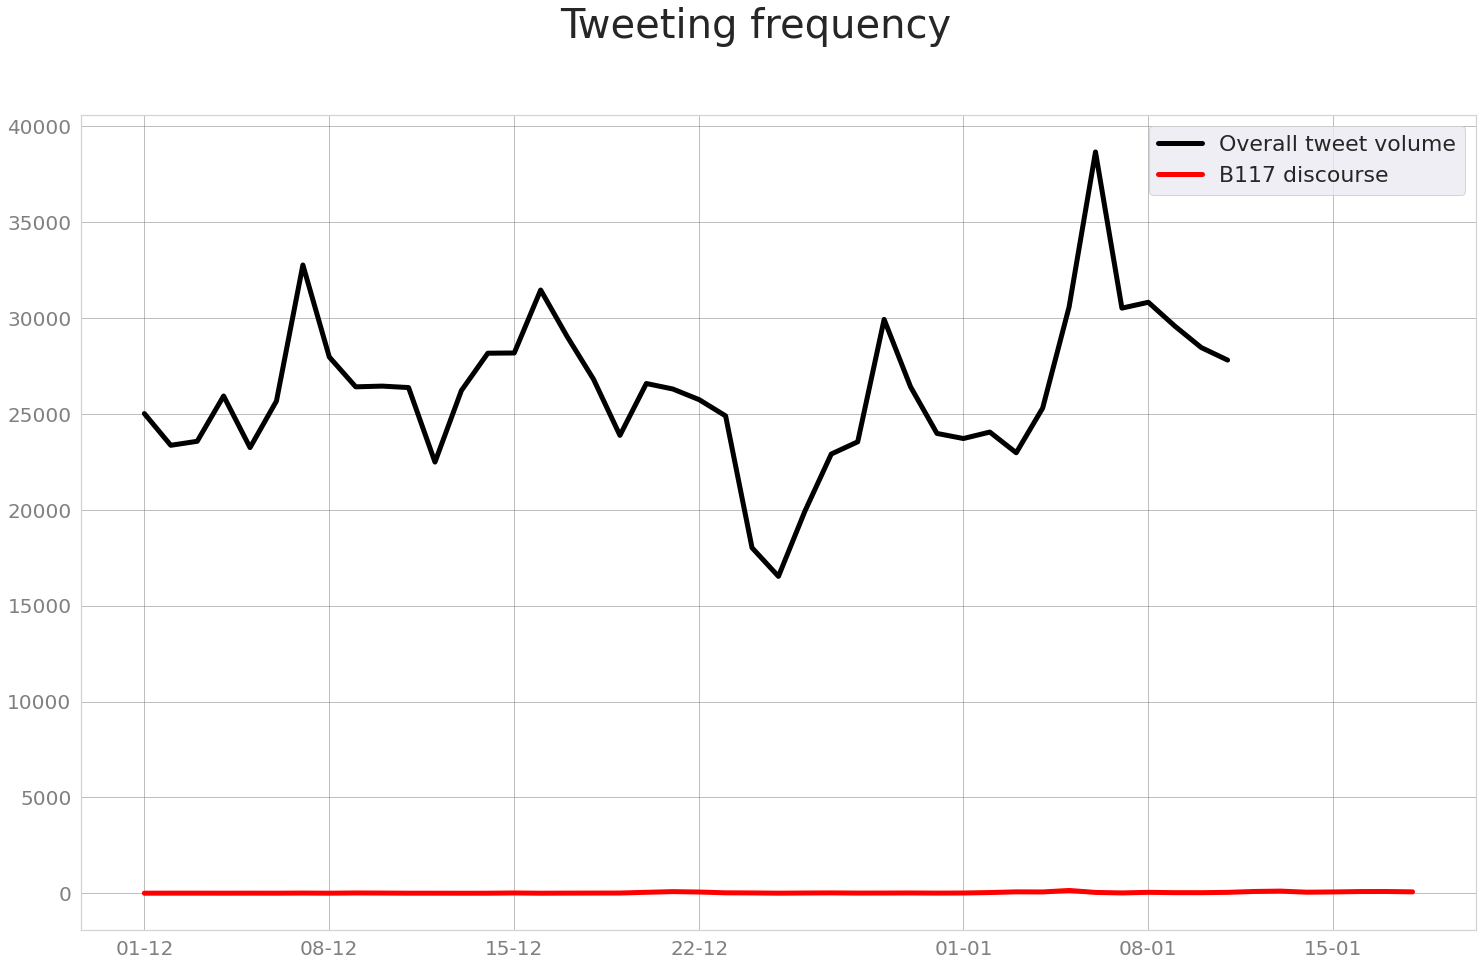

In [241]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)


themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)


fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
ax1 = sns.lineplot(x="date", y="nr_of_tweets", 
                   label = "Overall tweet volume",
                     linewidth = 5, data = data_freq_df)

ax1 = sns.lineplot(x="date", y="nr_of_tweets", 
                   label = "B117 discourse",
                   color = "red",
                     linewidth = 5, data = freq_df)


ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

    
fig.suptitle("Tweeting frequency", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()

plot_name = "fig/tweet_frequency_vs_b117_mentions.png"
fig.savefig(plot_name)

fig.show()

# Sentiment analysis

In [242]:
clean_df["date"] = pd.to_datetime(clean_df["date"])

# Rolling average
clean_df['compound_7day_ave'] = clean_df.compound.rolling(7).mean().shift(-3)

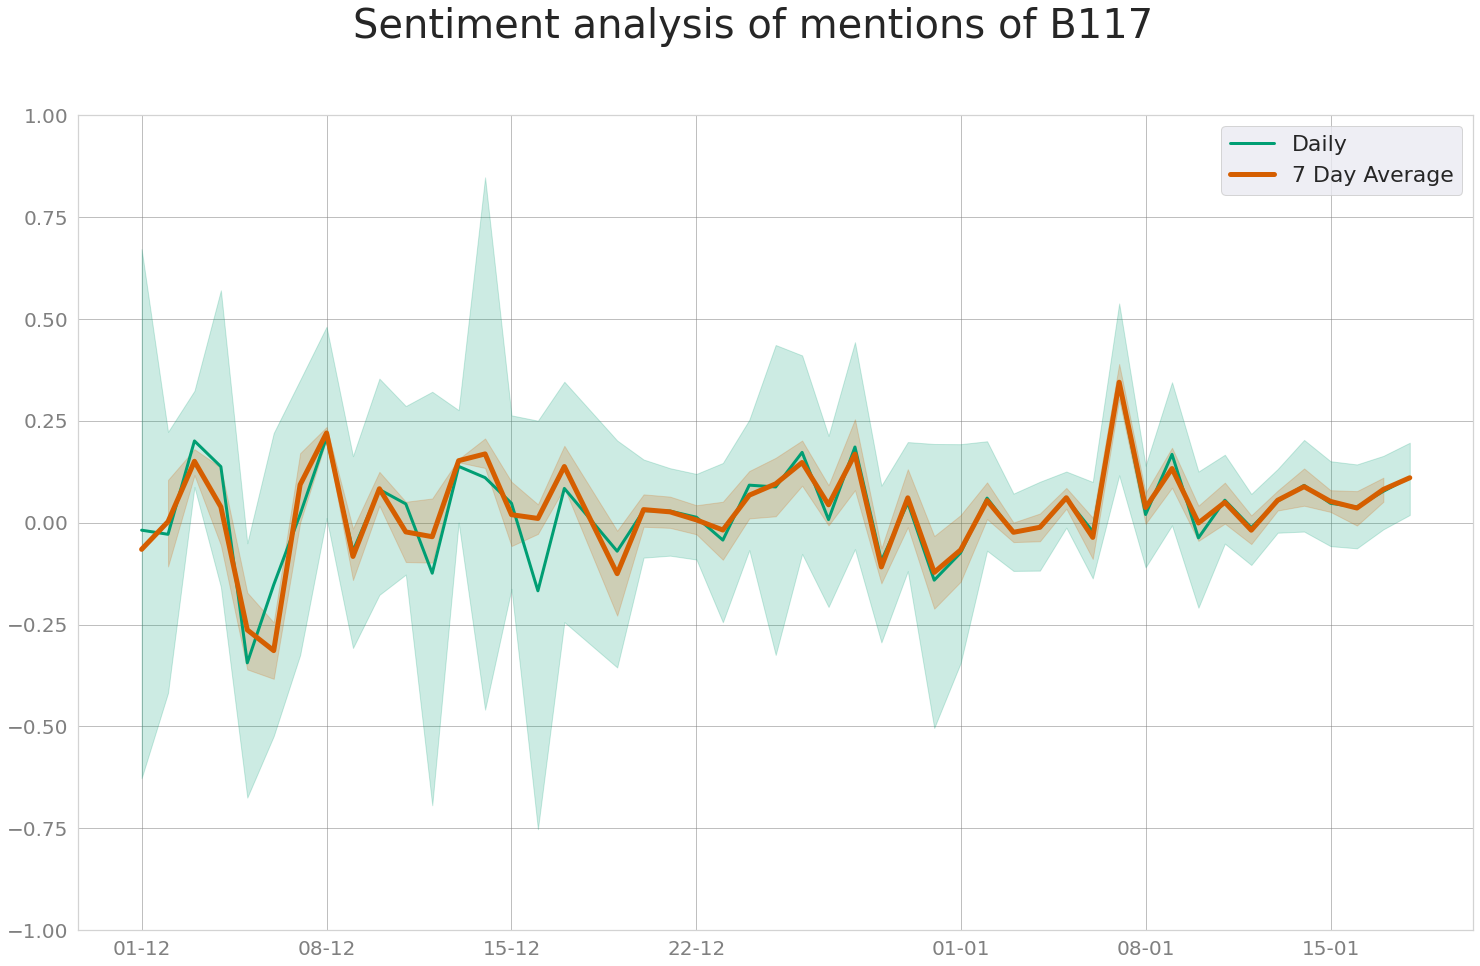

In [245]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)


themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
ax1 = sns.lineplot(x="date", y="compound", 
                   label="Daily", color = palette[2],
                     linewidth = 3, data = clean_df)

ax1 = sns.lineplot(x="date", y="compound_7day_ave", 
                   label="7 Day Average", color = palette[6],
                     linewidth = 5, data = clean_df)


ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

    
fig.suptitle("Sentiment analysis of mentions of B117", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()
ax1.set(ylim=(-1, 1))

plot_name = "fig/sentiment_compound.png"
fig.savefig(plot_name)

fig.show()

# Word Frequency

In [53]:
texts = clean_df["mentioneless_text"].to_list()

In [54]:
import string

texts = ", ".join(texts)
texts = texts.translate(str.maketrans('', '', string.punctuation))
texts = texts.lower()

In [55]:
wordlist = texts.split()

wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))

In [56]:
word_freq = pd.DataFrame(data = list(zip(wordlist, wordfreq))).drop_duplicates().reset_index(drop = True).rename(columns={0:"word", 1:"Frequency"})

In [57]:
word_freq

,word,Frequency
0,minkskandale,1
1,eller,95
2,ej,9
3,smittetryk,2
4,mutation,489
...,...,...
6233,hverken,1
6234,præcise,1
6235,kernen,1
6236,tilskrives,1


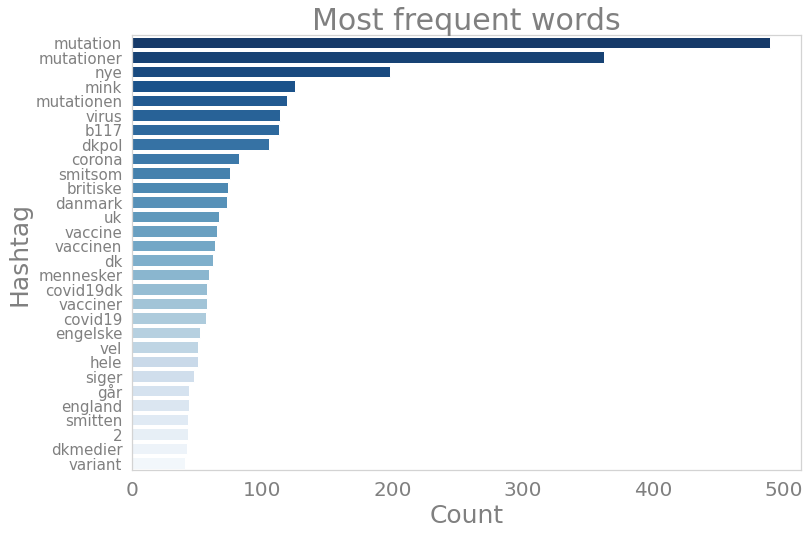

In [58]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pyplot_themes as themes

file = open("stop_words.txt","r+")
stop_words = file.read().split()

word_freq = word_freq[~word_freq["word"].isin(stop_words)]
df0 = word_freq.nlargest(30, columns=['Frequency'])
nr_hash = len(df0["word"].unique())

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
palette = sns.color_palette("Blues_r", nr_hash)

ax = sns.barplot(y="word", x="Frequency", palette = palette, data = df0)

ax.set(xlabel="Count", ylabel = "Hashtag")
ax.xaxis.get_label().set_fontsize(25)
ax.yaxis.get_label().set_fontsize(25)
ax.axes.set_title("Most frequent words",fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=15)

plot_name = "fig/word_frequency.png"
fig.savefig(plot_name)

In [59]:
word_freq[~word_freq["word"].isin(stop_words)]

,word,Frequency
0,minkskandale,1
3,smittetryk,2
4,mutation,489
7,udfordret,3
8,befolkningens,2
...,...,...
6233,hverken,1
6234,præcise,1
6235,kernen,1
6236,tilskrives,1


In [60]:
word_freq

,word,Frequency
0,minkskandale,1
3,smittetryk,2
4,mutation,489
7,udfordret,3
8,befolkningens,2
...,...,...
6233,hverken,1
6234,præcise,1
6235,kernen,1
6236,tilskrives,1
